<a href="https://colab.research.google.com/github/rishabhgoel760/Airbnb-Smart-Pricing-Customer-Churn-Prediction---ML/blob/main/Part%20B%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [32]:
df= pd.read_csv("/content/drive/MyDrive/Internshala/Course Resource/Customer_data - customer_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Data exploration and Preprocessing

In [33]:
df.shape

(7043, 21)

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [36]:
df.dropna(subset=['TotalCharges'], inplace=True)
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [37]:
num_cols=df.dtypes[df.dtypes!="object"].index
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

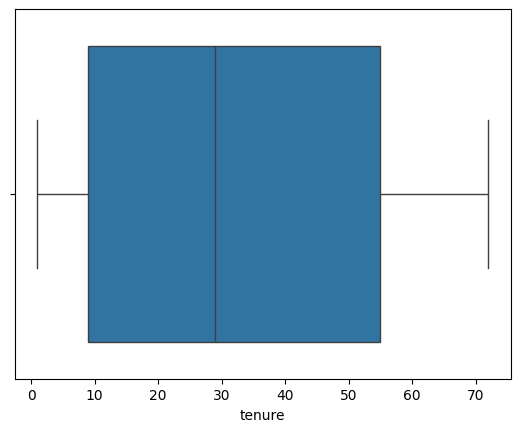

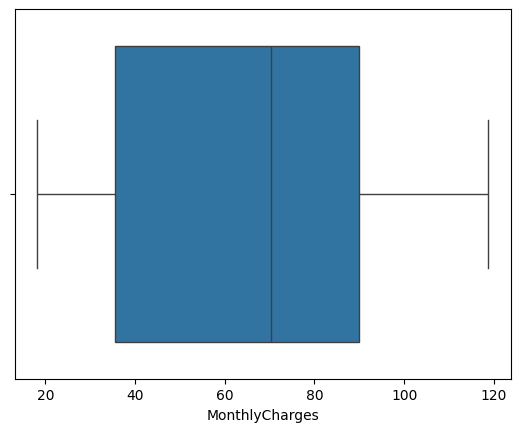

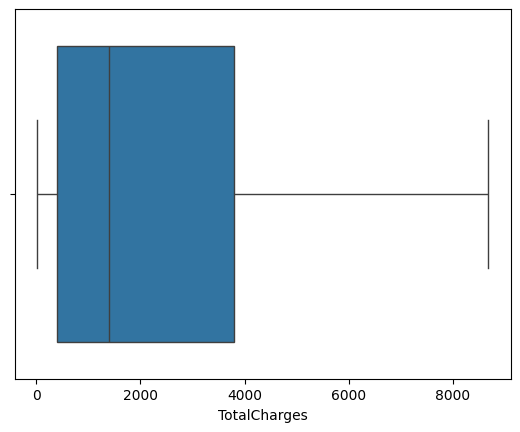

In [38]:
num_cols_filtered = num_cols.drop('SeniorCitizen')
for i in num_cols_filtered:
  sns.boxplot(x=df[i])
  plt.show()
# I our data set we don't have any outliers so we are good to go.

In [39]:
cat_col= df.dtypes[df.dtypes=="object"].index
cat_col

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

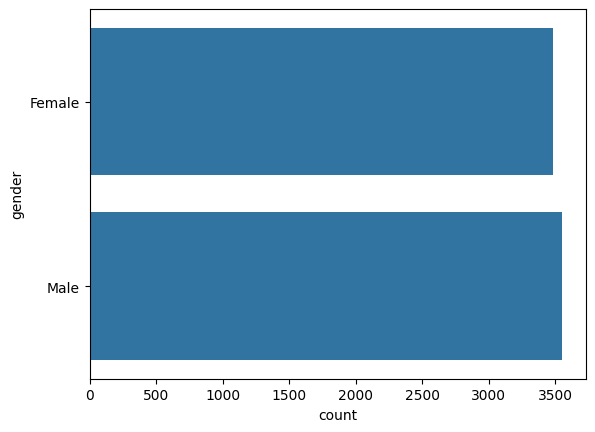

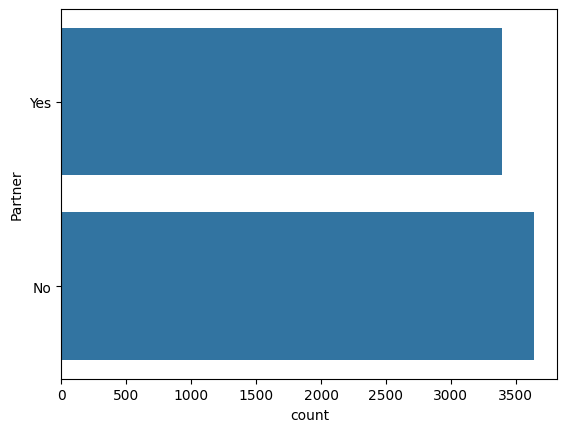

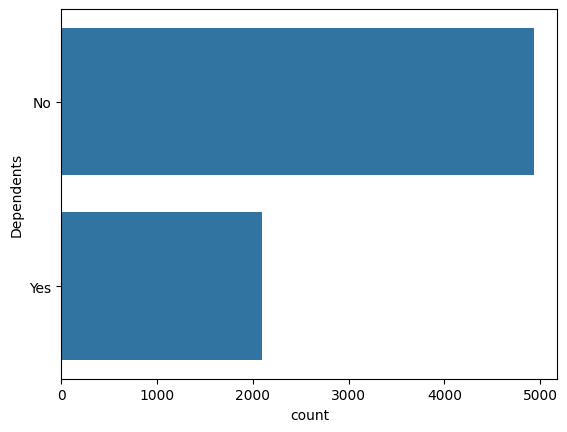

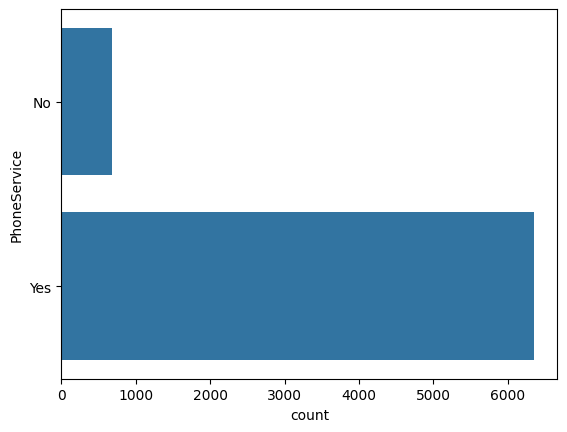

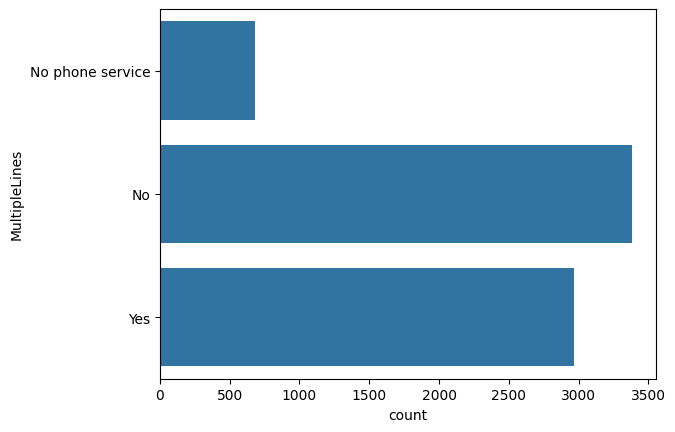

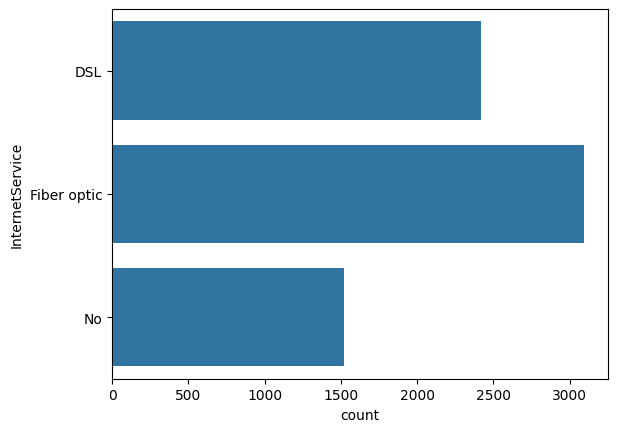

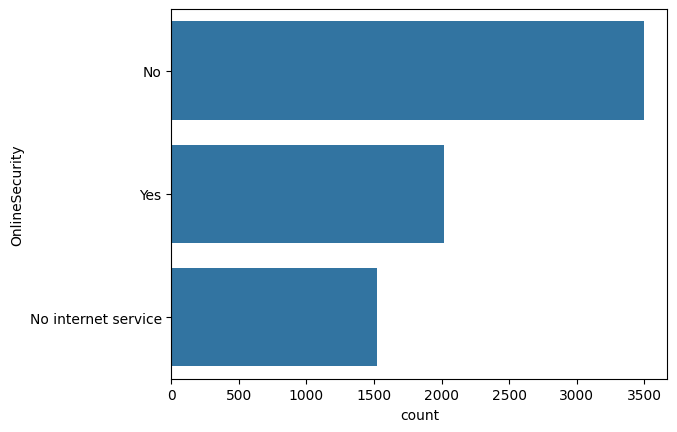

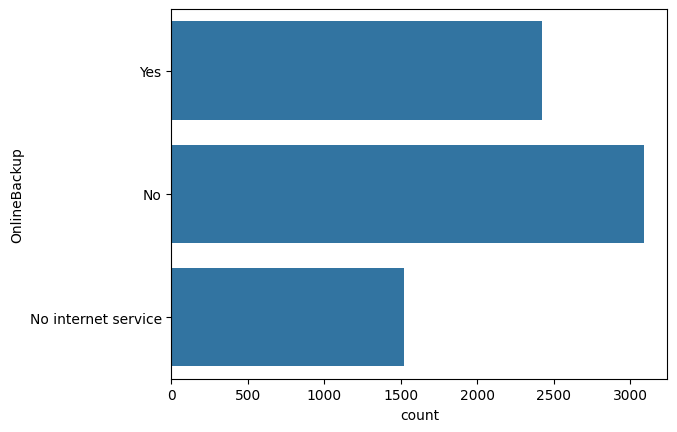

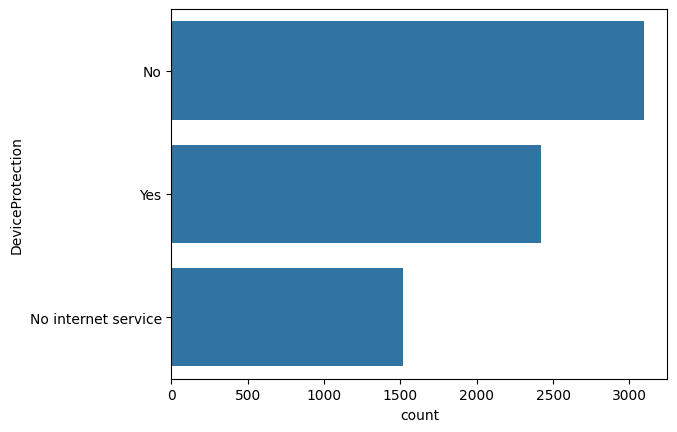

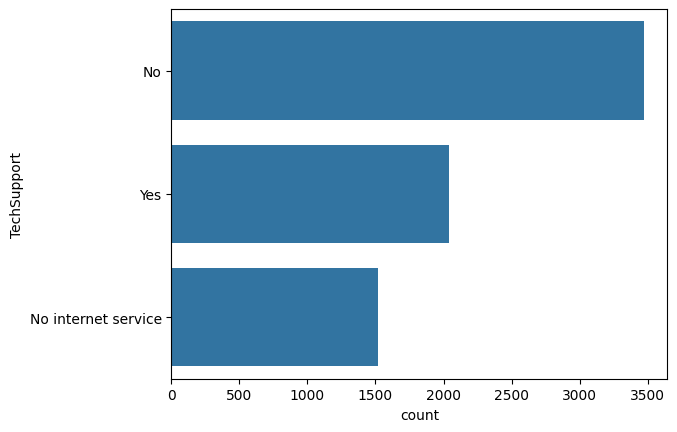

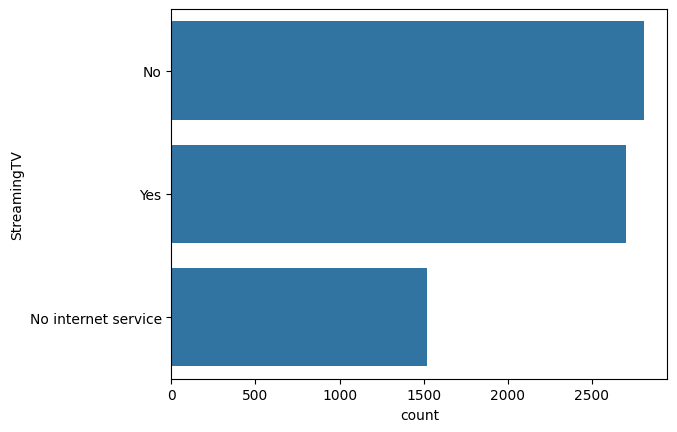

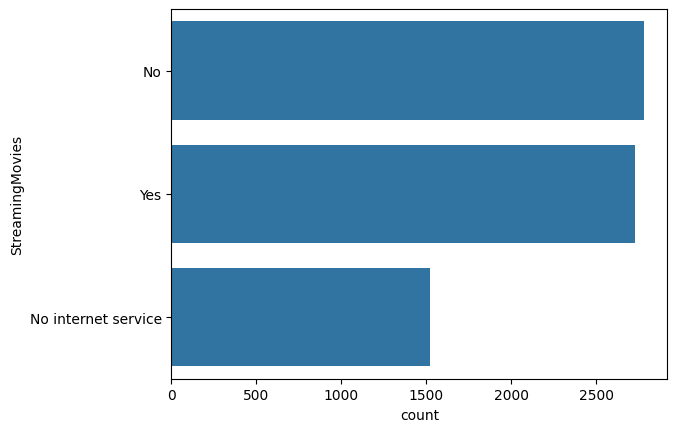

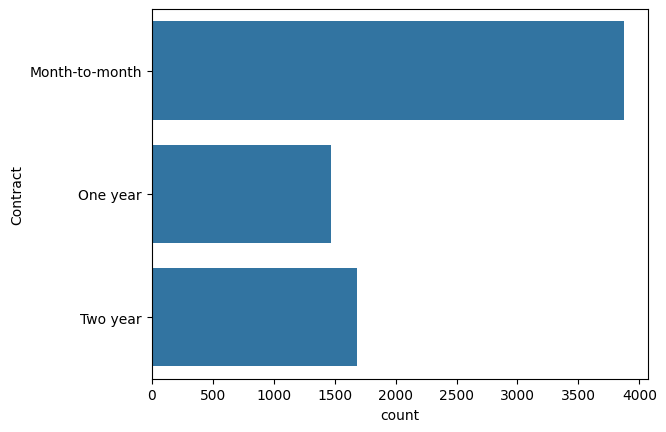

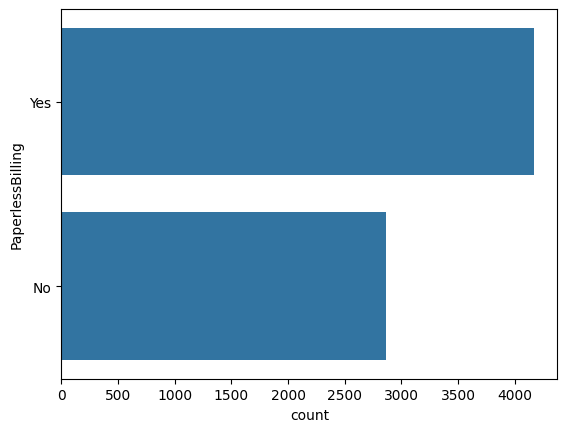

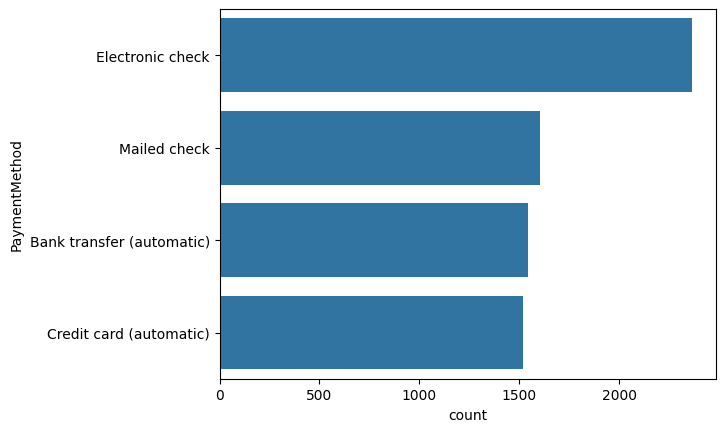

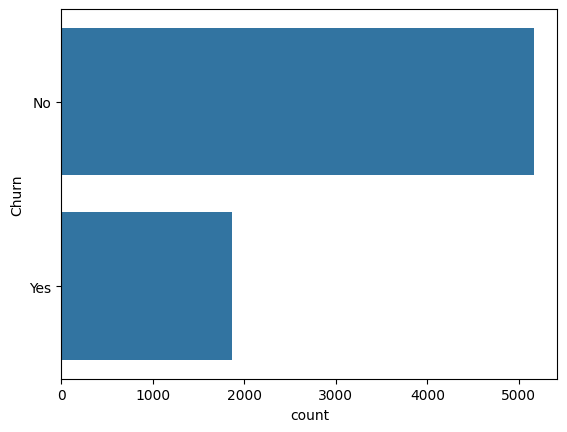

In [40]:
cat_col_filtered = cat_col.drop("customerID")
for i in cat_col_filtered:
  sns.countplot(data=df,y=i)
  plt.show()
# Using these plot I analysed the trend that are there in our dataset i.e. which class is dominating within it's category.

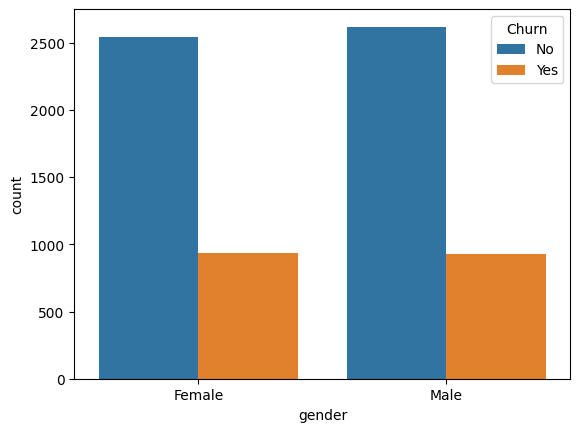

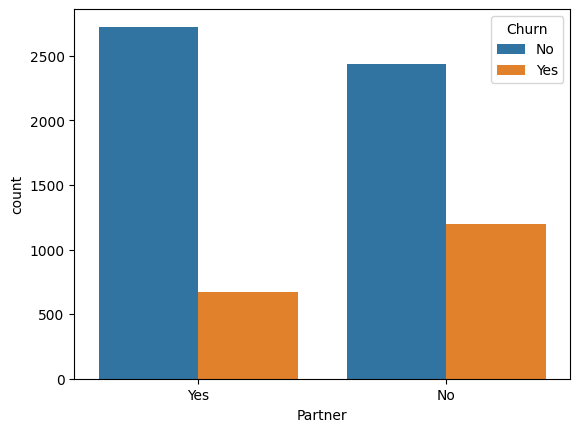

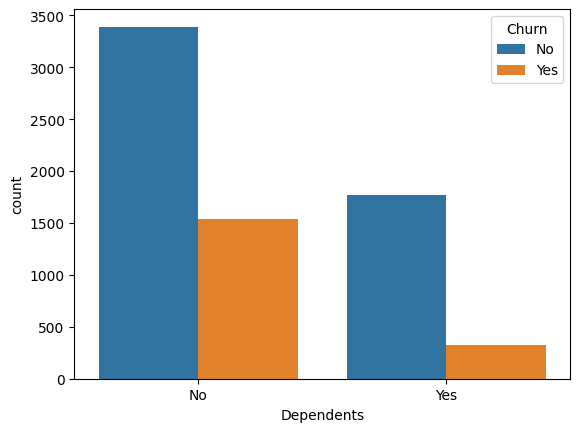

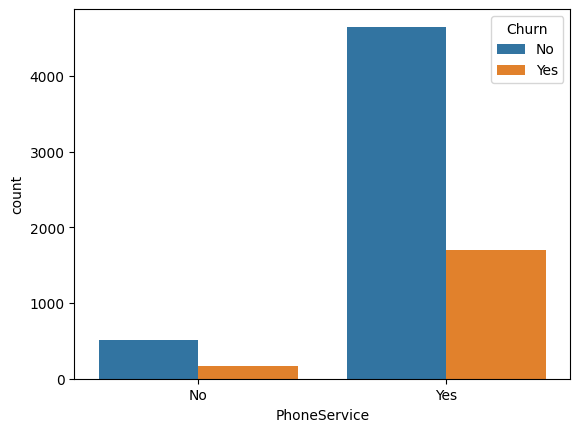

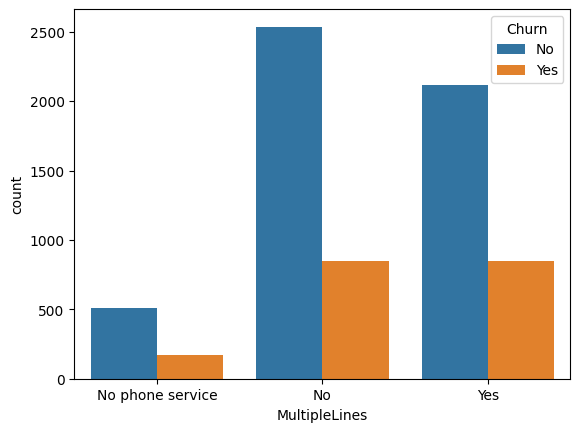

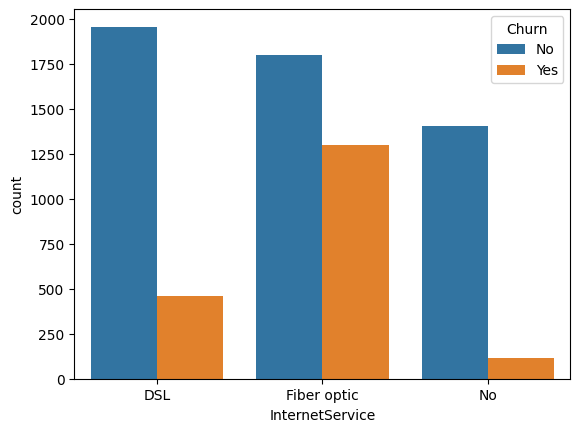

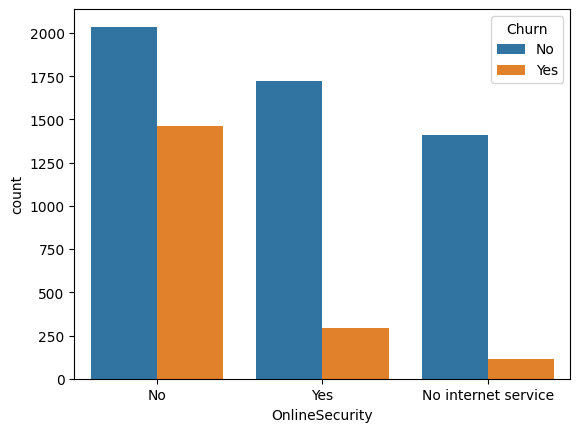

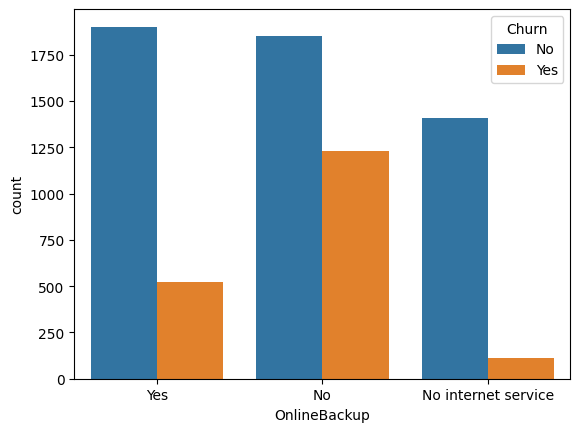

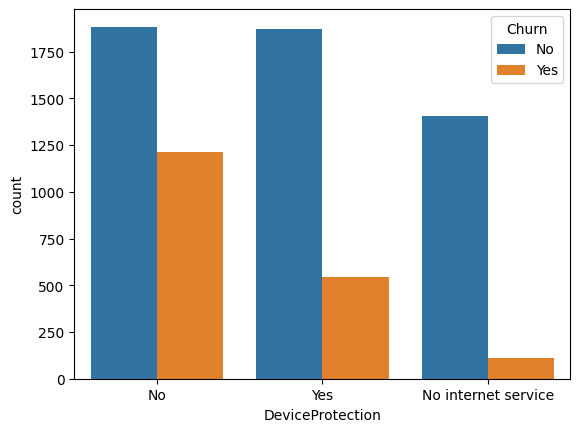

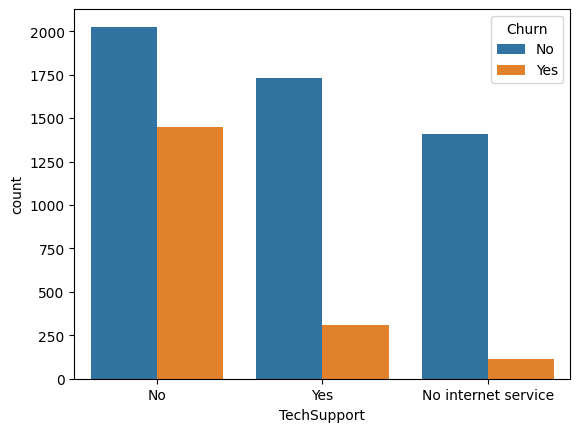

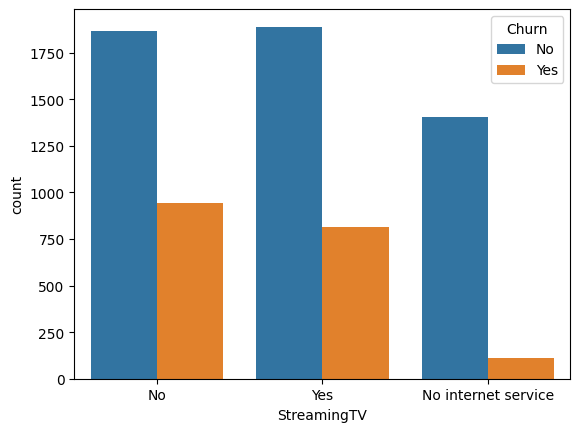

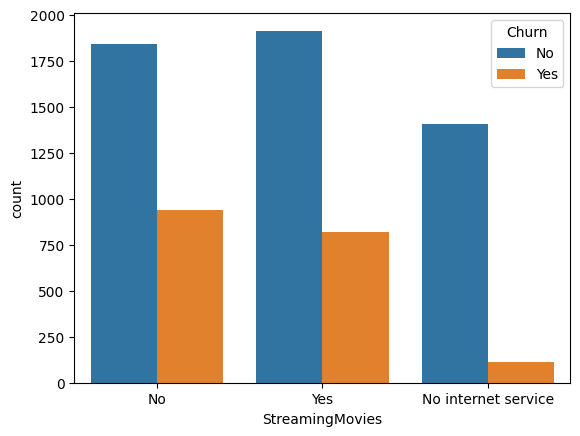

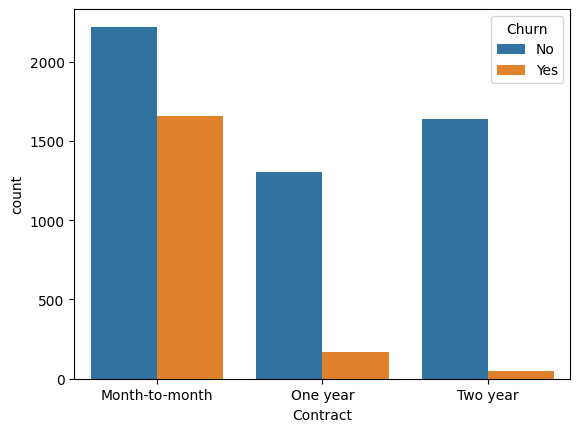

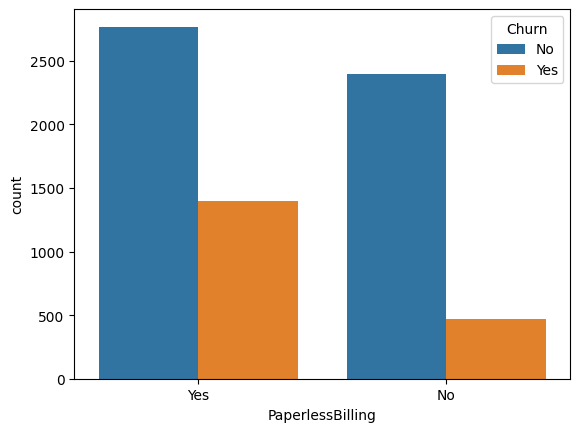

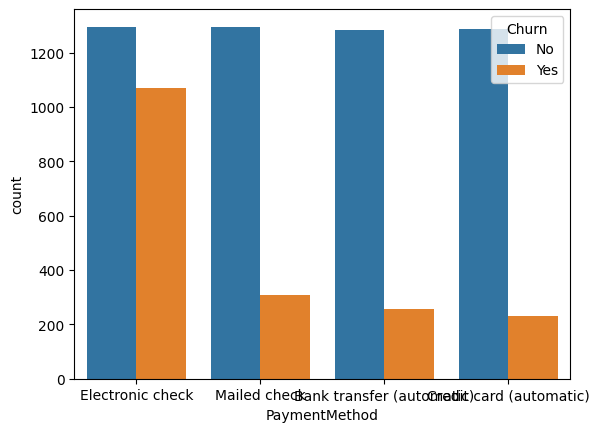

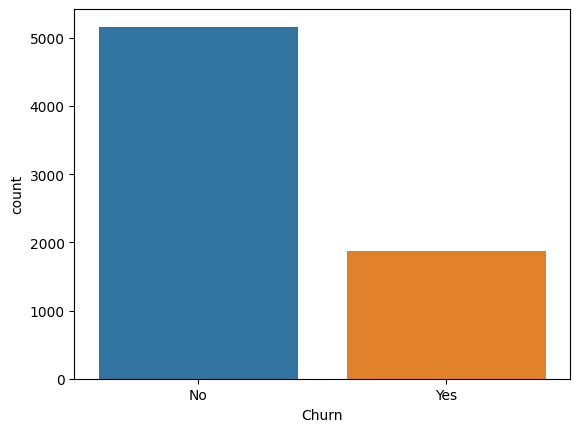

In [41]:
cat_col_filtered = cat_col.drop("customerID")
for i in cat_col_filtered:
  sns.countplot(data=df,x=i,hue='Churn')
  plt.show()
# Using this plot i analyzed that which class is having higher value of churn rate within it's category.


In [42]:
#Encoding the variables that shows a strong relationship based on count plot.
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
# List of categorical columns to encode
columns_to_encode = [ 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
'PaymentMethod', 'Churn'
]
# Apply LabelEncoder to each column separately
for col in columns_to_encode:
  df[col] = lb.fit_transform(df[col])
# Encode each column individually
df[columns_to_encode] = df[columns_to_encode].apply(lambda col: lb.fit_transform(col))
# Check the transformed data
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [43]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64


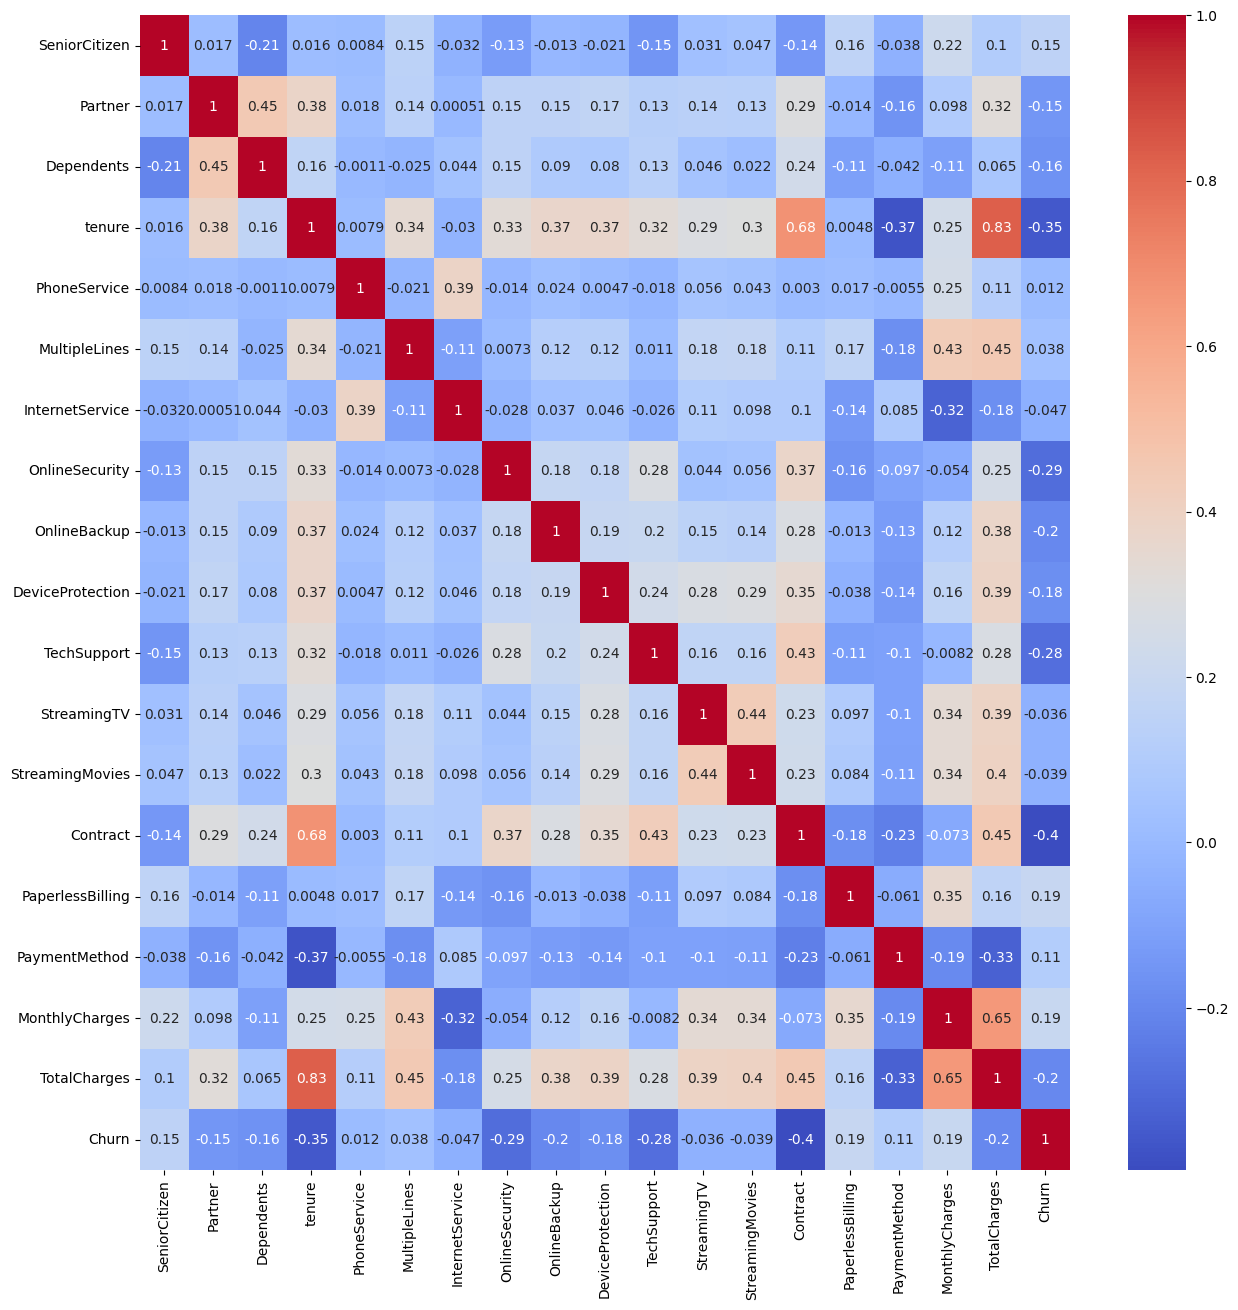

In [44]:
df= df.drop(['customerID', 'gender'], axis=1)
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()
# Through this correlation matrix I tried to understand the kind of relaionship that exist betwwen churn and other variables
# That is whether there is a positive or negative relationship.

In [45]:
x=df.drop('Churn', axis=1)
y=df['Churn']
print(x.shape)
print(y.shape)

(7032, 18)
(7032,)


In [46]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5274, 18)
(1758, 18)
(5274,)
(1758,)


**Model Bulding**

**Logistic Regression Algorithm**

In [47]:
m1 = LogisticRegression()
m1.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Accuracy score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.8050815320439894
Testing Score 0.7878270762229806


In [49]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0 0 1 ... 0 0 0]


**Model Evaluation**

In [50]:
# calculating the precision, recall, f1-score
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[1155  145]
 [ 228  230]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.61      0.50      0.55       458

    accuracy                           0.79      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



**Model Building**

**Decision Tree Algorithm **

In [51]:
params = {'criterion':['gini','entropy'],
'min_samples_split':[10,15,20,25],
'max_depth':[5,11,15,18]}

dt=DecisionTreeClassifier()
gs = GridSearchCV(dt,param_grid=params,scoring='accuracy',cv=5)
gs.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 11, 15, 18],
                         'min_samples_split': [10, 15, 20, 25]},
             scoring='accuracy')

**Model Evaluation**

In [52]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

In [53]:
predictions = gs.predict(x_test)
print("Training Score",gs.score(x_train,y_train))
print("Testing Score",gs.score(x_test,y_test))

Training Score 0.7986348122866894
Testing Score 0.7844141069397043


In [54]:
cm_gs = confusion_matrix(y_test,predictions)
print(cm_gs)
print(classification_report(y_test,predictions))

[[1176  124]
 [ 255  203]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1300
           1       0.62      0.44      0.52       458

    accuracy                           0.78      1758
   macro avg       0.72      0.67      0.69      1758
weighted avg       0.77      0.78      0.77      1758



**Model Building**

**Random Forest Algorithm**

In [55]:
n_estimators = [2, 6, 7, 5]
max_features = [2,3,4,5]
bootstrap = [True,False]

param_grid1 = {'n_estimators':n_estimators,
'max_features':max_features,
'bootstrap':bootstrap}

rf = RandomForestClassifier()

grid = GridSearchCV(rf,param_grid1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [2, 6, 7, 5]})

**Model Evaluation**

In [56]:
print("Training Score",grid.score(x_train,y_train))
print("Testing Score",grid.score(x_test,y_test))

# the differnce is very high in training and testing score which can lead to overfitting in the model so we should
# avoid this algorithm
grid.best_params_

Training Score 0.9783845278725825
Testing Score 0.7667804323094426


{'bootstrap': True, 'max_features': 4, 'n_estimators': 7}

In [57]:
predictions2 = grid.predict(x_test)
cm_gs2 = confusion_matrix(y_test,predictions2)
print(cm_gs2)
print(classification_report(y_test,predictions2))

[[1131  169]
 [ 241  217]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1300
           1       0.56      0.47      0.51       458

    accuracy                           0.77      1758
   macro avg       0.69      0.67      0.68      1758
weighted avg       0.76      0.77      0.76      1758



**Model Building**

**SVM Algorithm**

In [58]:
svm_param_grid = {
'C': [0.1,1,10], #Regularization Parameter
'kernel': ['rbf'], #Kernel type to be used
'gamma': ['scale'] #kernel coefficient for 'rbf', 'poly', 'sigmoid'
}

svm = SVC()
svm_grid_search = GridSearchCV( svm, svm_param_grid, cv=5, scoring = 'accuracy')

#since it was it taking too much time to evaluate with other values of kernel like inear or poly and auto for the value og gamma so I chosoe to
#reduce their values

svm_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [59]:
svm_best_params = svm_grid_search.best_params_
svm_best_accuracy = svm_grid_search.best_score_
print("SVM Best Params:",svm_best_params)
print("SVM Best Accuracy:", svm_best_accuracy)

SVM Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Accuracy: 0.7648830454059012


**Model Evaluation**

In [60]:
print("Training Score",svm_grid_search.score(x_train,y_train))
print("Testing Score",svm_grid_search.score(x_test,y_test))

Training Score 0.7804323094425484
Testing Score 0.7787258248009101


In [61]:
svm_predict = svm_grid_search.predict(x_test)
cm_svm = confusion_matrix(y_test,svm_predict)
print(cm_svm)
print(classification_report(y_test,svm_predict))

[[1257   43]
 [ 346  112]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1300
           1       0.72      0.24      0.37       458

    accuracy                           0.78      1758
   macro avg       0.75      0.61      0.62      1758
weighted avg       0.77      0.78      0.74      1758



**Recommendations:**
1. Except random forest model we are getting training and testing score difference as low. Therefore we can consider any of the algorithm as they will not give us the overfitted model.
2. Out of all the algorithms the optimal precision is in case of logestic regression and the difference in training and testing score is also not too huge so i will go with the Logistic Regression Algorithm.

**Recommedations to lessen the churn rate:**
1. Focus on Long-Term Contracts- one or two year contract customers are less likely to churn so incentive those customers in month on month contract to migrate to 1 or 2 year contract.
2. Address Senior Citizen Needs
3. Review Pricing and Payment Options
4. Improve Customer Communication
5. Review Pricing and Payment Options
6. Personalize Customer Experience


video explanation link: https://drive.google.com/file/d/1ee-o_EuUyYRyKvaQXMpways0SAGApxLl/view?usp=drive_link
